<h1 align='center'>HW1- 2023</h1>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Q1> Video game sales data (https://www.kaggle.com/gregorut/videogamesales),
consisting of rank, genre, publisher, and global sales amount (in millions) worldwide.
Using Python create a Pie chart and find out which genre accounts for a high
portion of global sales in a video game. This would help understand the potential
needs of the video game that will be published by the company.

In [ ]:
data = pd.read_csv('vgsales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
print(data.isnull().sum())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [ ]:
print(data.duplicated().sum())

0


In [ ]:
data.shape

(16598, 11)

In [ ]:
sales_by_genre = data.groupby('Genre')['Global_Sales'].sum()
sales_by_genre = sales_by_genre.sort_values(ascending=False)
print("No. of genres: ", len(sales_by_genre.index), "\n")
print(sales_by_genre)

No. of genres:  12 

Genre
Action          1751.18
Sports          1330.93
Shooter         1037.37
Role-Playing     927.37
Platform         831.37
Misc             809.96
Racing           732.04
Fighting         448.91
Simulation       392.20
Puzzle           244.95
Adventure        239.04
Strategy         175.12
Name: Global_Sales, dtype: float64


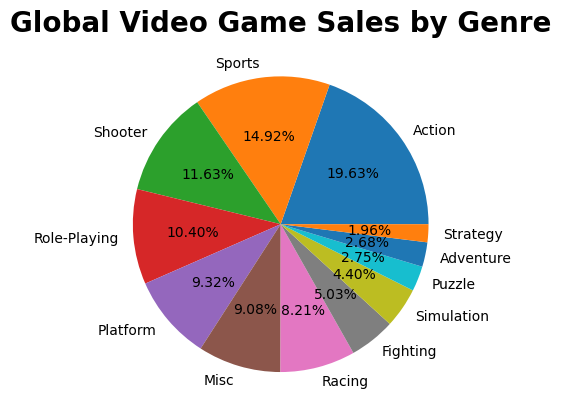

In [ ]:
plt.pie(sales_by_genre, labels=sales_by_genre.index, autopct='%1.2f%%')
plt.title('Global Video Game Sales by Genre', size=20, fontweight="bold")
plt.show()

=> '***Action***' genre acounts for the highest portion of global sales.

### QUESTION 2

In [ ]:
data = pd.read_csv('SeoulBikeData.csv')
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
print(data.isnull().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


In [ ]:
print(data.duplicated().sum())

0


In [ ]:
data.shape

(8760, 14)


**Q1- What is the trend of rented bike count over the months?**

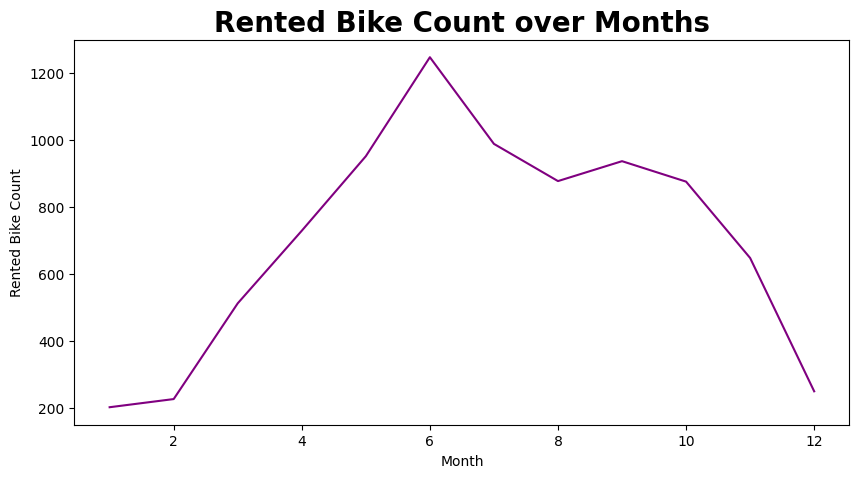

In [ ]:
# extract Month from Date column
data['Month'] = pd.to_datetime(data['Date'], format='%d/%m/%Y').dt.month

# line chart of rented bike count over the months
plt.figure(figsize=(10,5))
sns.lineplot(x='Month', y='Rented Bike Count', data=data, color='purple', errorbar=None)
plt.title('Rented Bike Count over Months', size=20, fontweight="bold")
plt.xlabel('Month')
plt.ylabel('Rented Bike Count')
plt.show()


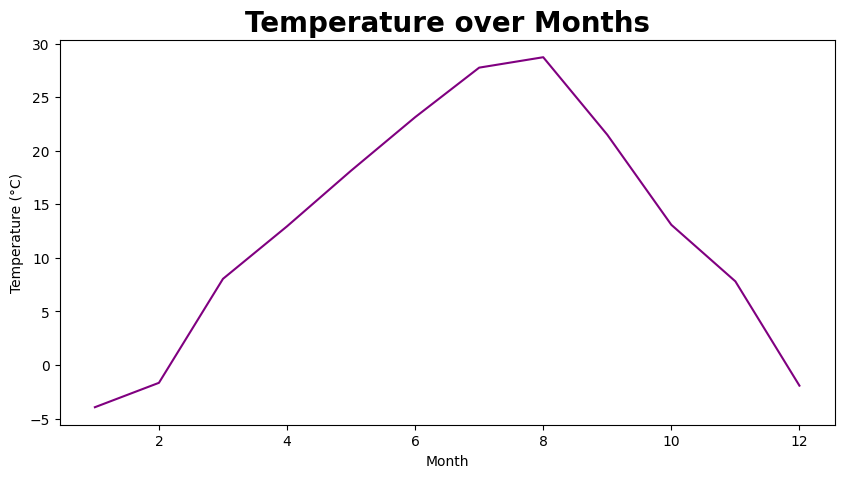

In [ ]:
# line chart of temperature over months
plt.figure(figsize=(10,5))
sns.lineplot(x='Month', y='Temperature(°C)', data=data, color='purple', errorbar=None)
plt.title('Temperature over Months', size=20, fontweight="bold")
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()

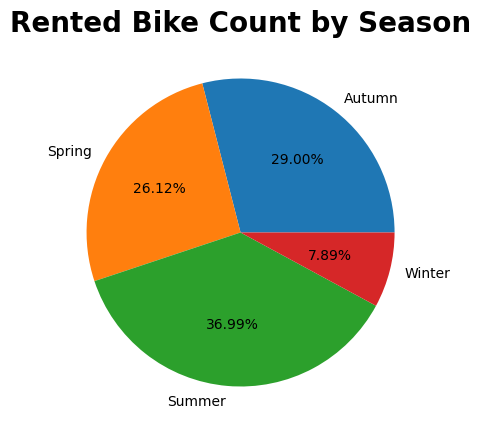

In [ ]:
# pie chart of rented bike count by seasons
bike_data_season = data.groupby('Seasons').sum(numeric_only=True).reset_index()
plt.figure(figsize=(5,5))
plt.title('Rented Bike Count by Season', size=20, fontweight="bold")
plt.pie(bike_data_season['Rented Bike Count'], labels=bike_data_season['Seasons'], autopct='%1.2f%%')
plt.show()

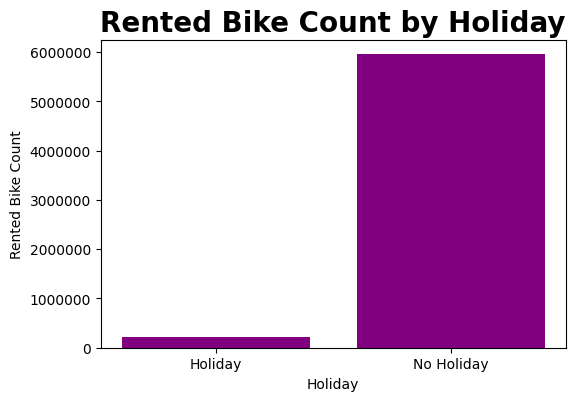

In [ ]:
bike_data_holiday = data.groupby('Holiday').sum(numeric_only=True).reset_index()
plt.figure(figsize=(6,4))
plt.bar(bike_data_holiday['Holiday'], bike_data_holiday['Rented Bike Count'], color='purple')
plt.title('Rented Bike Count by Holiday', size=20, fontweight="bold")
plt.xlabel('Holiday')
plt.ylabel('Rented Bike Count')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

<Figure size 1000x500 with 0 Axes>

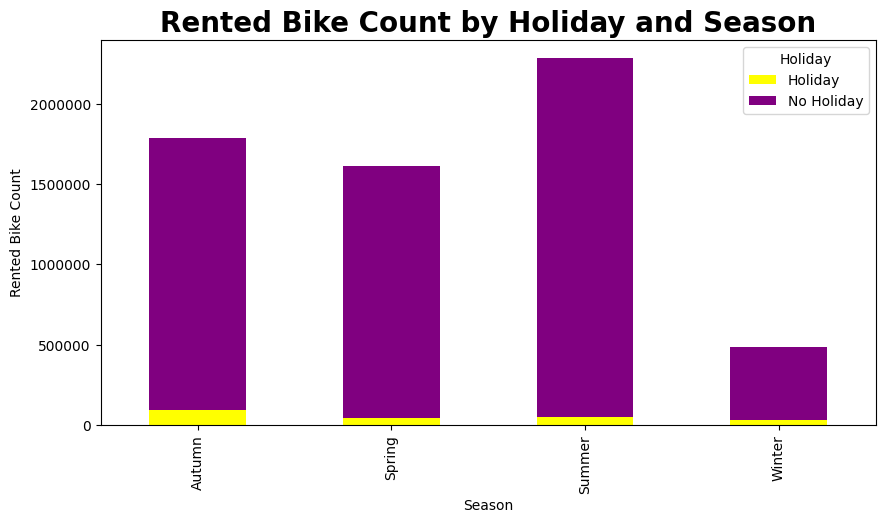

In [ ]:
# stacked bar chart of rented bike count by holiday
bike_data_holiday = data.groupby(['Holiday', 'Seasons'])['Rented Bike Count'].sum().reset_index()
plt.figure(figsize=(10,5))
# pivot table
bike_data_holiday = bike_data_holiday.pivot(index='Seasons', columns='Holiday', values='Rented Bike Count')
bike_data_holiday.plot(kind='bar', stacked=True, figsize=(10,5), color=['yellow', 'purple'])
plt.title('Rented Bike Count by Holiday and Season', size=20, fontweight="bold")
plt.xlabel('Season')
plt.ylabel('Rented Bike Count')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

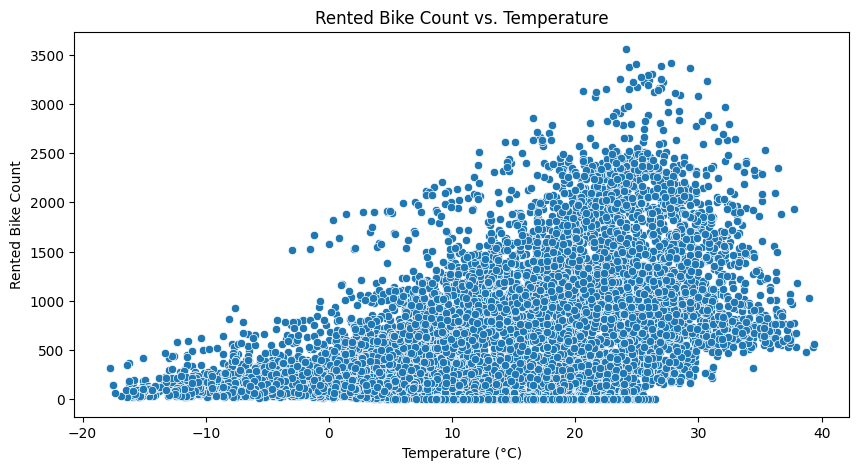

In [ ]:
# scatter plot of rented bike count and temperature
plt.figure(figsize=(10,5))
sns.scatterplot(x='Temperature(°C)', y='Rented Bike Count', data=data)
plt.title('Rented Bike Count vs. Temperature',)
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.show()

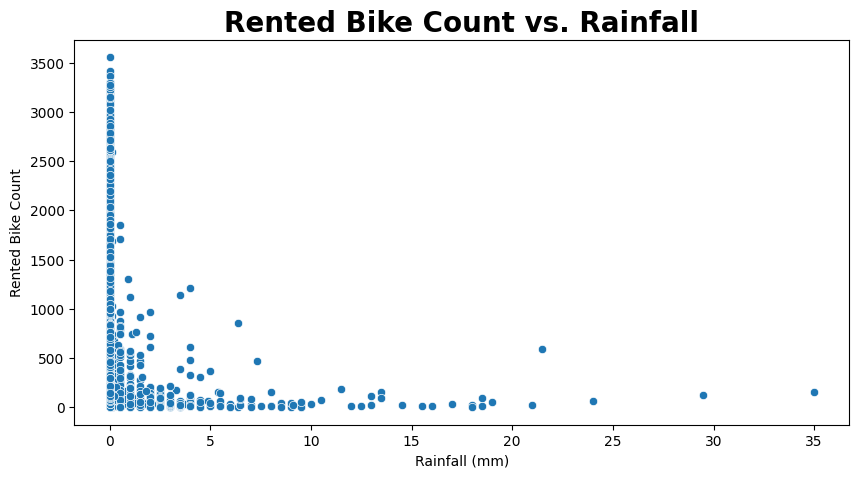

In [ ]:
# scatter plot of rented bike count and rainfall
plt.figure(figsize=(10,5))
sns.scatterplot(x='Rainfall(mm)', y='Rented Bike Count', data=data)
plt.title('Rented Bike Count vs. Rainfall', size=20, fontweight="bold")
plt.xlabel('Rainfall (mm)')
plt.ylabel('Rented Bike Count')
plt.show()

*ANSWER FOLLOWING QUESTIONS*

**Q2- Which seasons show greater demand for the rented bike than other seasons?**
> SUMMER

**Q3- Is the demand for rented bikes affected by the holiday season?**
> DECREASES IN HOLIDAYS

**Q4- Is there a relationship between the rented bike demand and temperature?**
> PEAK DEMAND AT ROOM TEMP 25 DEGREES

**Q5- Is there a relationship between the rented bike demand and the amount of rainfall?**
> LOW RAINFALL HAS HIGH DEMAND

---

### QUESTION 3

In [ ]:
# concatenate datasets for may and april
data = pd.concat([pd.read_csv('CallVoiceQuality_Data_2018_May.csv'),pd.read_csv('CallVoiceQualityExperience-2018-April.csv')])
data.head()

,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name,Indoor_Outdoor_Travelling
0,RJio,Travelling,4G,5.0,Satisfactory,-1.000000,-1.000000,NaN,NaN
1,RJio,Travelling,4G,2.0,Poor Voice Quality,28.593588,77.164276,NCT,NaN
2,BSNL,Indoor,3G,5.0,Satisfactory,-1.000000,-1.000000,NaN,NaN
3,BSNL,Indoor,3G,5.0,Satisfactory,-1.000000,-1.000000,NaN,NaN
4,BSNL,Indoor,3G,5.0,Satisfactory,-1.000000,-1.000000,NaN,NaN


In [ ]:
# missing values in the 'Indoor_Outdoor_Travelling' column replaced with the values from the 'In Out Travelling' column
data['Indoor_Outdoor_Travelling'].fillna(data['In Out Travelling'], inplace=True)
data.drop('In Out Travelling', axis=1, inplace=True)
data.head()

,Operator,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name,Indoor_Outdoor_Travelling
0,RJio,4G,5.0,Satisfactory,-1.000000,-1.000000,NaN,Travelling
1,RJio,4G,2.0,Poor Voice Quality,28.593588,77.164276,NCT,Travelling
2,BSNL,3G,5.0,Satisfactory,-1.000000,-1.000000,NaN,Indoor
3,BSNL,3G,5.0,Satisfactory,-1.000000,-1.000000,NaN,Indoor
4,BSNL,3G,5.0,Satisfactory,-1.000000,-1.000000,NaN,Indoor


In [ ]:
print("Original dataframe shape", data.shape)


Original dataframe shape (66685, 8)


In [ ]:
print(data.isnull().sum())

Operator                         0
Network Type                     1
Rating                           1
Call Drop Category               1
Latitude                         1
Longitude                        1
State Name                   17121
Indoor_Outdoor_Travelling        1
dtype: int64


In [ ]:
print(data.duplicated().sum())

32101


In [ ]:
# remove rows with missing values, remove duplicates
data = data.dropna()
data.drop_duplicates(inplace=True)

In [ ]:
print("Cleaned dataframe shape", data.shape)

Cleaned dataframe shape (33886, 8)


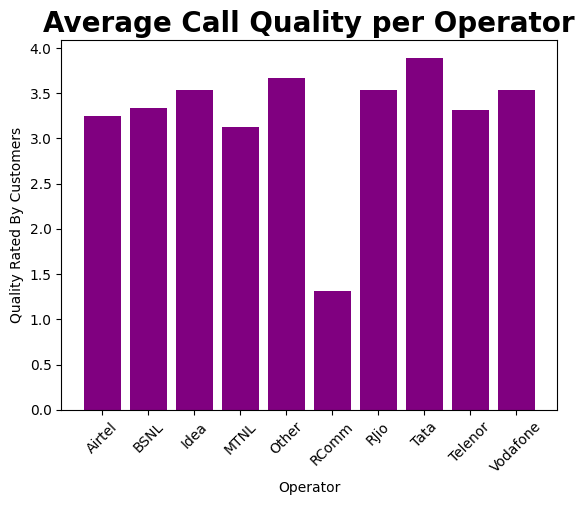

In [ ]:
# vertical bar chart of avg call quality rating per operator
pivot_table = pd.pivot_table(data, values='Rating', index='Operator')
plt.bar(pivot_table.index, pivot_table['Rating'], color='purple')
plt.title('Average Call Quality per Operator', size=20, fontweight="bold")
plt.xlabel('Operator')
plt.xticks(rotation=45)
plt.ylabel('Quality Rated By Customers')
plt.show()

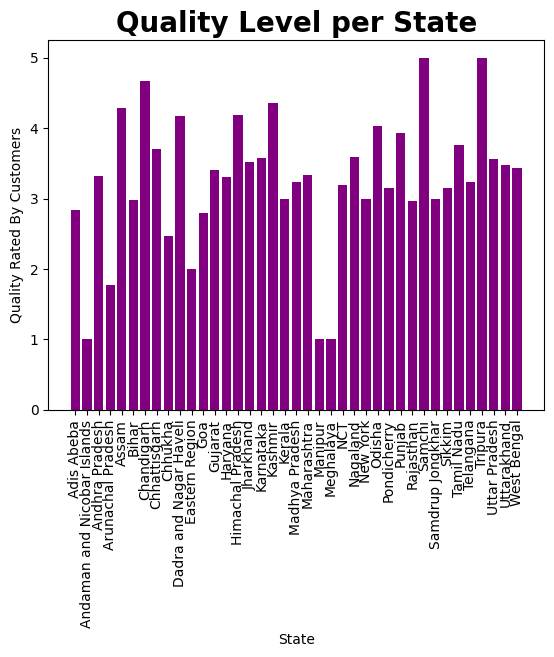

In [ ]:
# vertical bar chart of call quality level (rating) per state in India
pivot_table = pd.pivot_table(data, values='Rating', index='State Name')
plt.bar(pivot_table.index, pivot_table['Rating'], color='purple')
plt.title('Quality Level per State', size=20, fontweight="bold")
plt.xlabel('State')
plt.xticks(rotation=90)
plt.ylabel('Quality Rated By Customers')
plt.show()

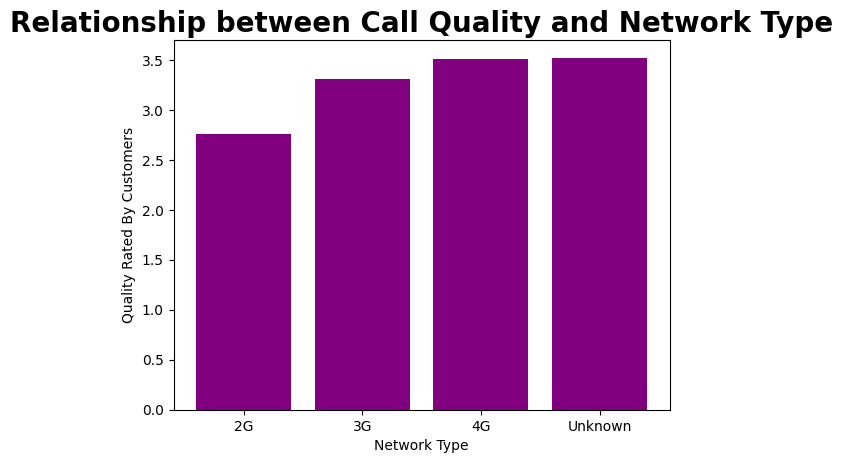

In [ ]:
# vertical bar chart showing relationship between call quality (rating) and network type
pivot_table = pd.pivot_table(data, values='Rating', index='Network Type')
plt.bar(pivot_table.index, pivot_table['Rating'], color='purple')
plt.title('Relationship between Call Quality and Network Type', size=20, fontweight="bold")
plt.xlabel('Network Type')
plt.ylabel('Quality Rated By Customers')
plt.show()

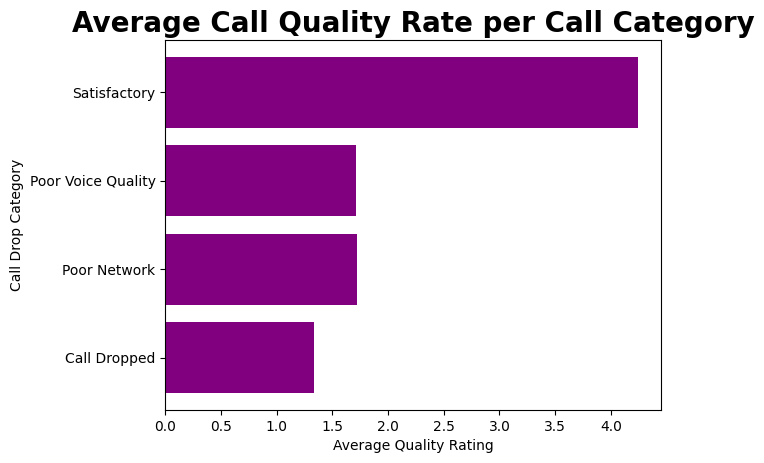

In [ ]:
# horizontal bar chart of avg call quality rate per call drop category
avg_quality = data.groupby('Call Drop Category')['Rating'].mean()
plt.barh(avg_quality.index, avg_quality.values, color='purple')
plt.title('Average Call Quality Rate per Call Category', size=20, fontweight="bold")
plt.xlabel('Average Quality Rating')
plt.ylabel('Call Drop Category')
plt.show()

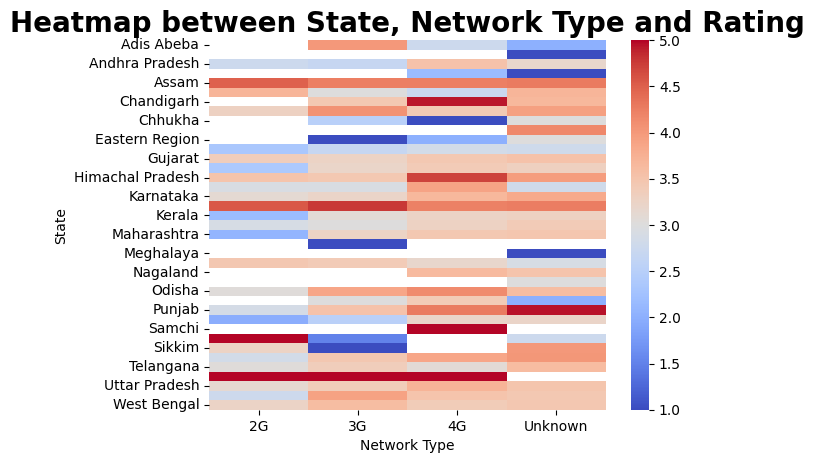

In [ ]:
# heatmap between State, Network Type and Rating
pivot_table = pd.pivot_table(data, values='Rating', index='State Name', columns='Network Type')
sns.heatmap(pivot_table, cmap='coolwarm')
plt.title('Heatmap between State, Network Type and Rating', size=20, fontweight="bold")
plt.xlabel('Network Type')
plt.ylabel('State')
plt.show()

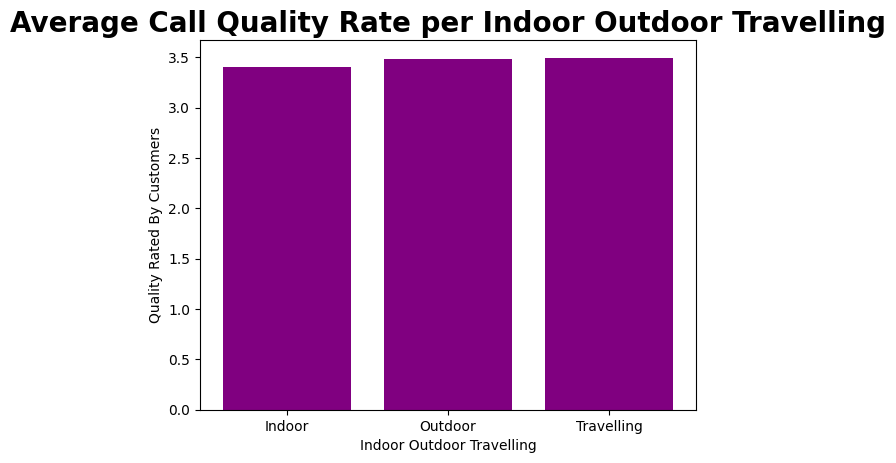

In [ ]:
# vertical bar chart of average call quality rate per Indoor Outdoor Travelling
pivot_table = pd.pivot_table(data, values='Rating', index='Indoor_Outdoor_Travelling')
plt.bar(pivot_table.index, pivot_table['Rating'], color='purple')
plt.title('Average Call Quality Rate per Indoor Outdoor Travelling', size=20, fontweight="bold")
plt.xlabel('Indoor Outdoor Travelling')
plt.ylabel('Quality Rated By Customers')
plt.show()

*ANSWER FOLLOWING QUESTIONS*

**Q1- What is the level of overall call quality? (by the operator, by the network)**
> HIGHEST BY TATA IN 4G

**Q2- Which operators provide low-value services**
> RCOMM

**Q3- What is the frequency of poor quality calls?**
> answer

**Q4- Based on the analysis results, what are the suggestions to improve call quality?**
> INCREASE TOWER BANDWIDTH IN SEVERAL STATES, SWITCH TO 4G